In [1]:
import pandas as pd

# # CSV 파일들을 읽어오기
# df1 = pd.read_csv("data/따릉이/dr_20240419.csv", encoding="euc-kr", index_col=0)
# df2 = pd.read_csv("data/따릉이/dr_20240420.csv", encoding="euc-kr", index_col=0)
# df3 = pd.read_csv("data/따릉이/dr_20240421.csv", encoding="euc-kr", index_col=0)

# # 세 데이터프레임을 하나로 합치기
# combined_df = pd.concat([df1, df2, df3])
# combined_df.to_csv("data/따릉이/dr_20240419_20_21.csv")

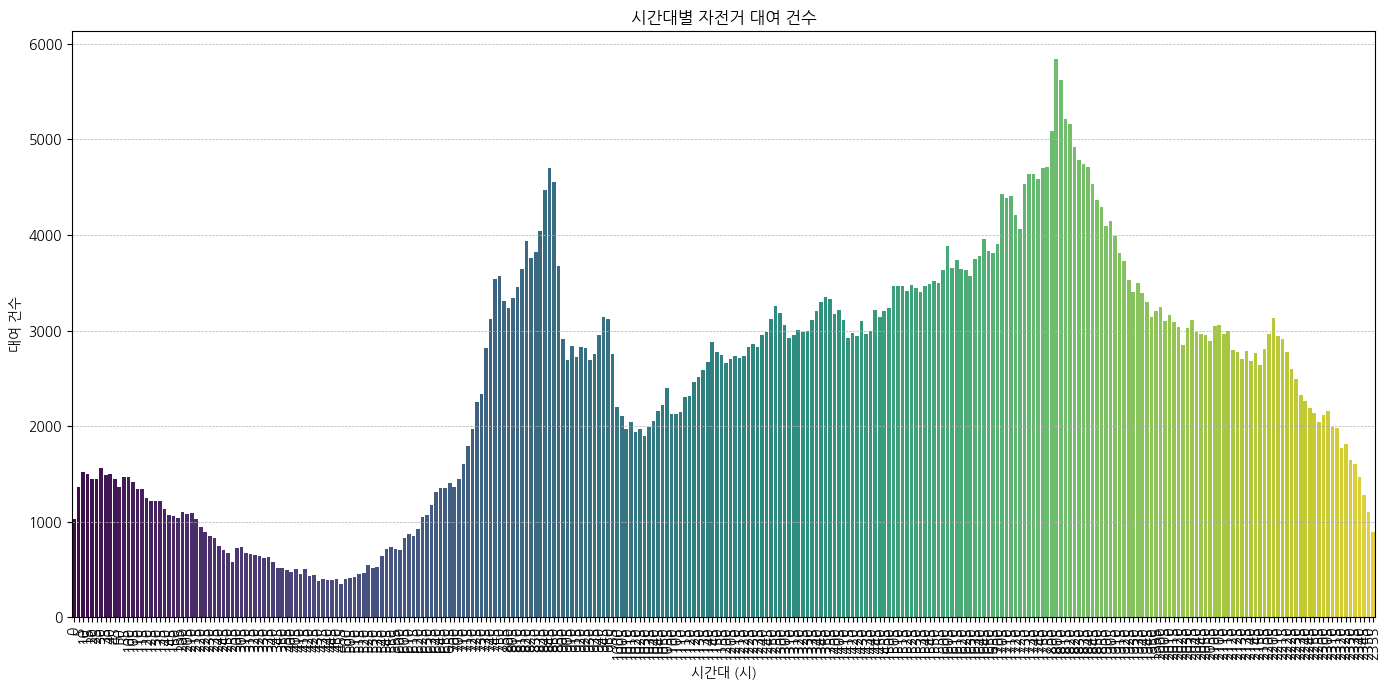

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 데이터 로드
data = pd.read_csv("data/따릉이/dr_20240419_20_21.csv")

# 질문 1: 어느 시간대에 자전거 대여가 가장 활발할까?

# '기준_시간대' 별로 데이터 집계
time_agg = data.groupby('기준_시간대')['전체_건수'].sum().reset_index()

# 시각화
plt.figure(figsize=(14, 7))
sns.barplot(x='기준_시간대', y='전체_건수', data=time_agg, palette='viridis')
plt.title('시간대별 자전거 대여 건수')
plt.xlabel('시간대 (시)')
plt.ylabel('대여 건수')
plt.xticks(rotation=90)  # x축 라벨을 회전하여 더 잘 보이게 함
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


<Axes: xlabel='기준_날짜', ylabel='count'>

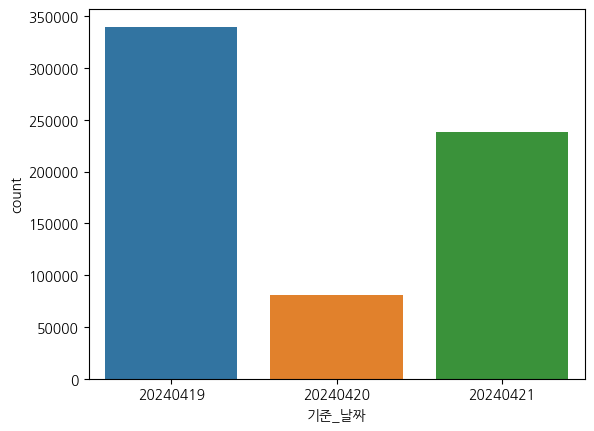

In [3]:
sns.countplot(data = data, x = "기준_날짜")

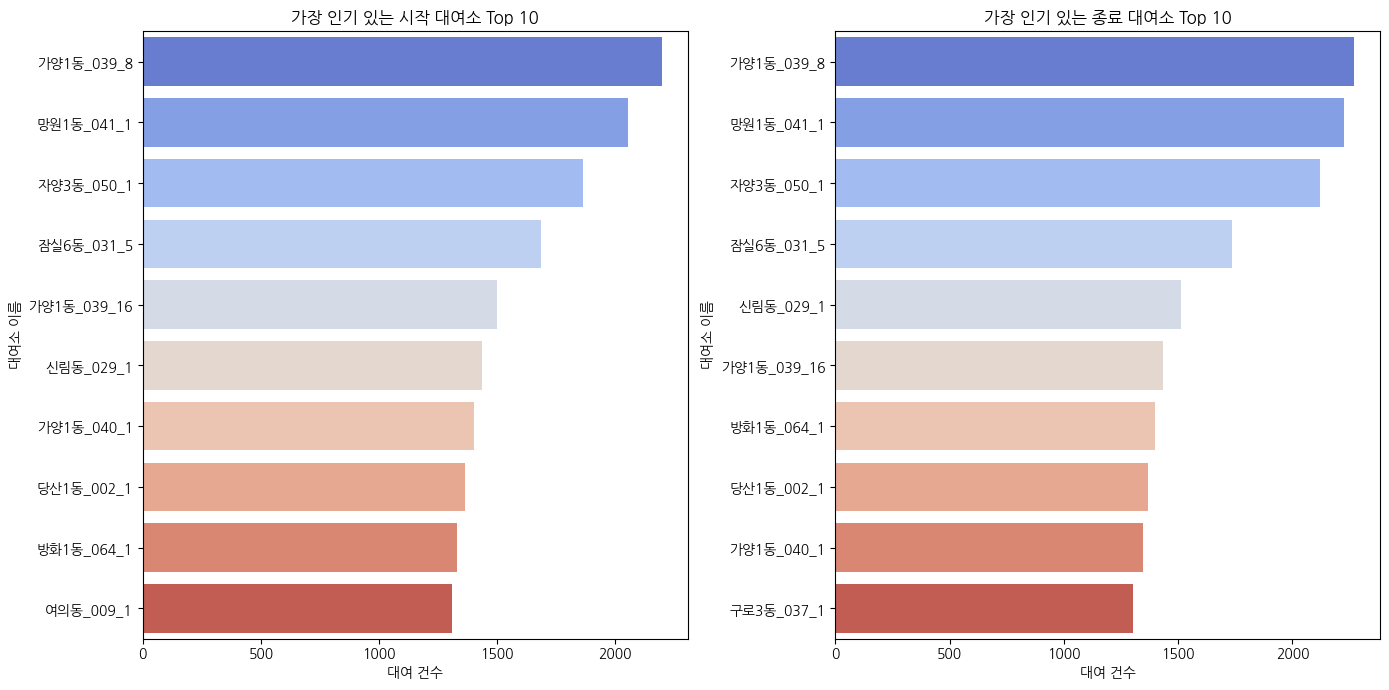

In [4]:
# 시작 대여소와 종료 대여소별로 데이터 집계
start_station_agg = data['시작_대여소명'].value_counts().nlargest(10)  # 가장 많은 대여가 시작된 상위 10개 대여소
end_station_agg = data['종료_대여소명'].value_counts().nlargest(10)  # 가장 많은 대여가 종료된 상위 10개 대여소

# 시각화
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x=start_station_agg.values, y=start_station_agg.index, palette='coolwarm')
plt.title('가장 인기 있는 시작 대여소 Top 10')
plt.xlabel('대여 건수')
plt.ylabel('대여소 이름')

plt.subplot(1, 2, 2)
sns.barplot(x=end_station_agg.values, y=end_station_agg.index, palette='coolwarm')
plt.title('가장 인기 있는 종료 대여소 Top 10')
plt.xlabel('대여 건수')
plt.ylabel('대여소 이름')

plt.tight_layout()
plt.show()

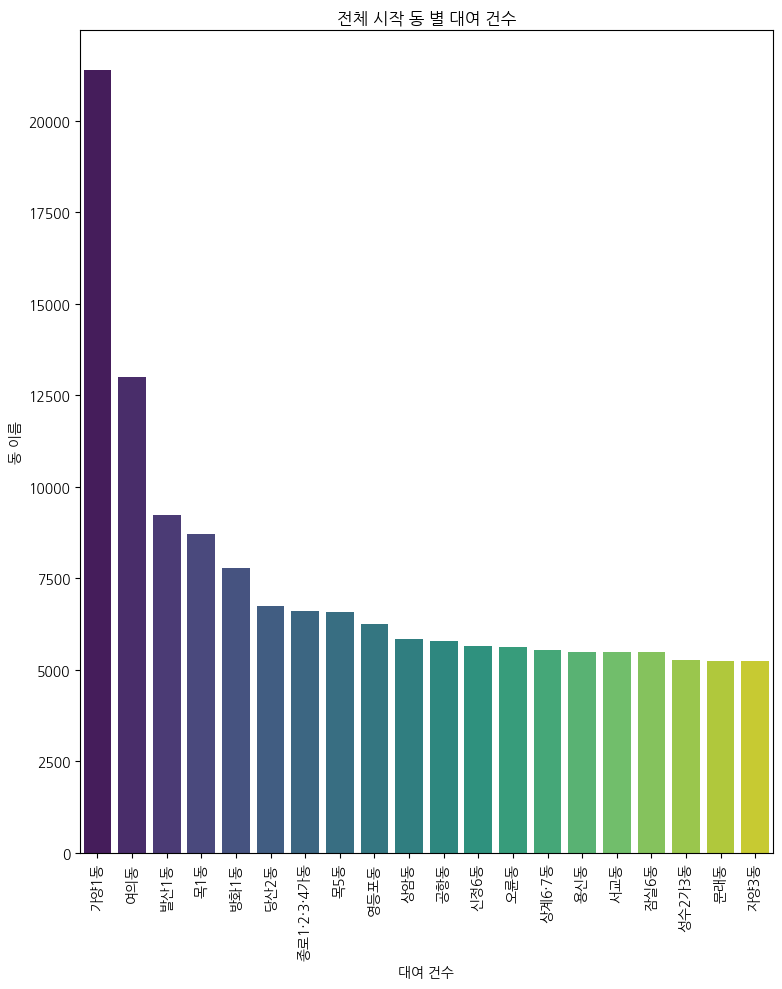

In [5]:
# 대여소명에서 '동'까지만 분리
data['시작_동'] = data['시작_대여소명'].str.split("_").str[0]

# 시작 및 종료 동 별로 데이터 집계
start_dong_agg = data['시작_동'].value_counts().sort_values(ascending=False)  # 모든 시작 동 집계

# 시각화
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
sns.barplot(y=start_dong_agg.values[:20], x=start_dong_agg.index[:20], palette='viridis')
plt.title('전체 시작 동 별 대여 건수')
plt.xlabel('대여 건수')
plt.xticks(rotation = 90)
plt.ylabel('동 이름')

plt.tight_layout()
plt.show()

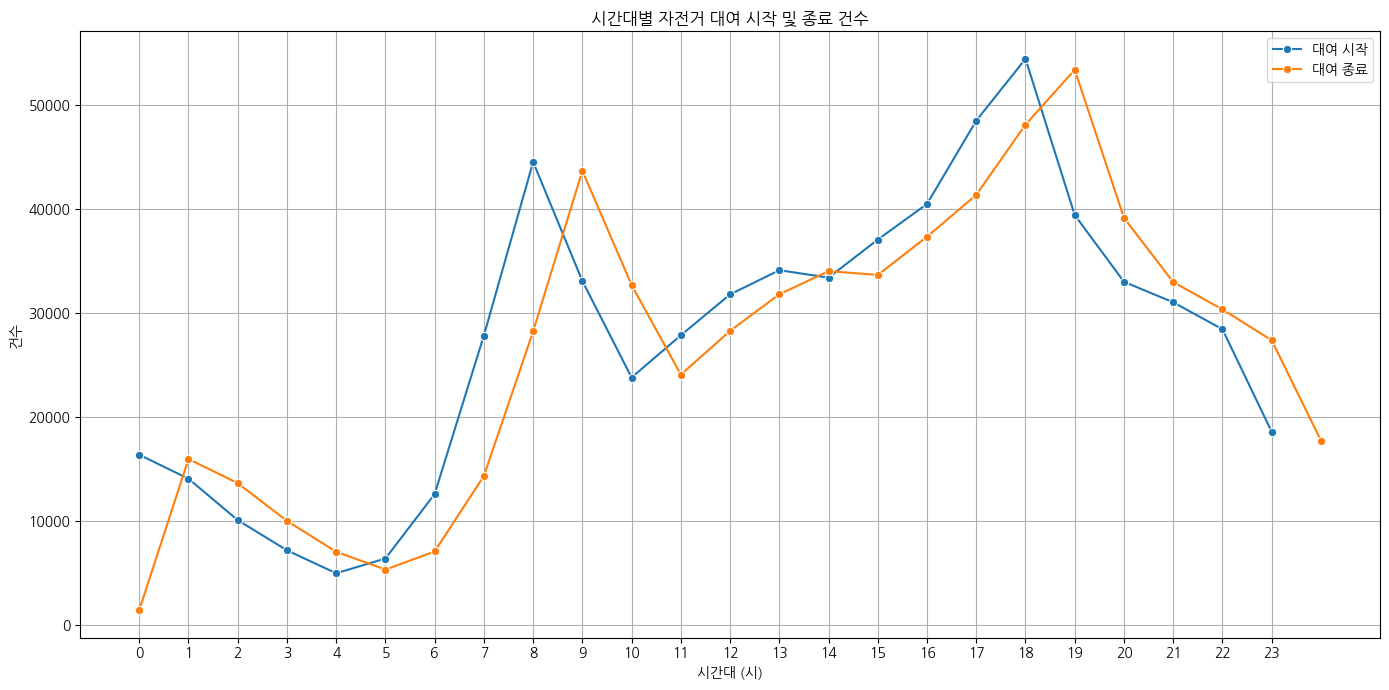

In [6]:

# 데이터에서 '시작_시간대'와 '종료_시간대' 추출
data['시작_시간대'] = data['기준_시간대'].apply(lambda x: int(x) // 100)  # 정수 나눗셈으로 시간대 추출
data['종료_시간대'] = data['기준_시간대'].apply(lambda x: (int(x) // 100) + 1 if x % 100 != 55 else (int(x) // 100))

# 시작 시간대와 종료 시간대별로 데이터 집계
start_time_agg = data['시작_시간대'].value_counts().sort_index()
end_time_agg = data['종료_시간대'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(14, 7))
sns.lineplot(x=start_time_agg.index, y=start_time_agg.values, label='대여 시작', marker='o')
sns.lineplot(x=end_time_agg.index, y=end_time_agg.values, label='대여 종료', marker='o')
plt.title('시간대별 자전거 대여 시작 및 종료 건수')
plt.xlabel('시간대 (시)')
plt.ylabel('건수')
plt.legend()
plt.grid(True)
plt.xticks(range(0, 24))  # 시간대는 0시부터 23시까지
plt.tight_layout()
plt.show()

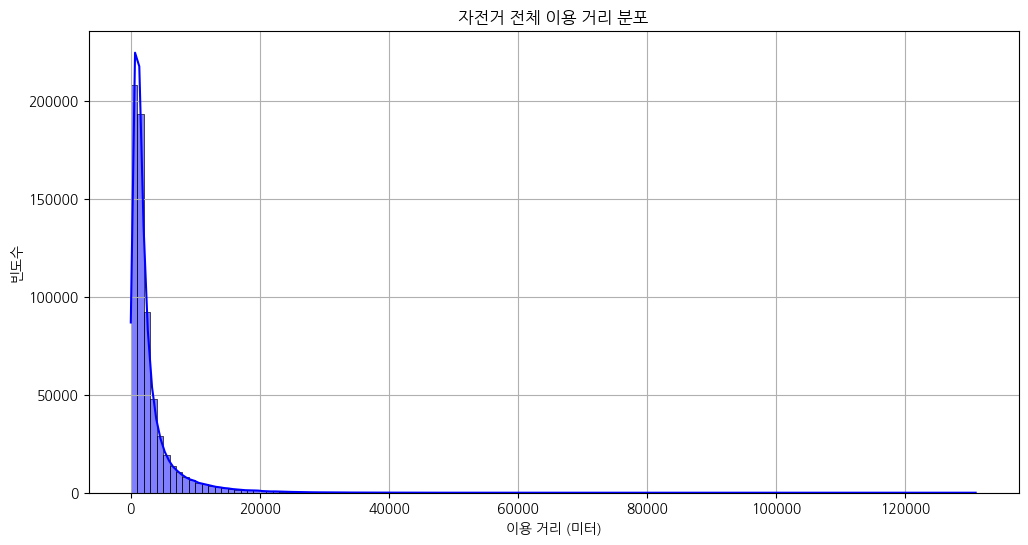

In [10]:

# 히스토그램 그리기
plt.figure(figsize=(12, 6))
sns.histplot(data['전체_이용_거리'], binwidth = 1000, kde=True, color='blue')
plt.title('자전거 전체 이용 거리 분포')
plt.xlabel('이용 거리 (미터)')
plt.ylabel('빈도수')
plt.grid(True)
plt.show()

In [16]:
# 날짜 형식으로 변환
data['기준_날짜'] = pd.to_datetime(data['기준_날짜'], format='%Y%m%d')

# 요일 추출 (월요일=0, 일요일=6)
data['요일'] = data['기준_날짜'].dt.dayofweek

# 요일 숫자를 한글 요일명으로 매핑
weekdays = ['월', '화', '수', '목', '금', '토', '일']
data['요일'] = data['요일'].apply(lambda x: weekdays[x])
data

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,종료_대여소_ID,종료_대여소명,전체_건수,전체_이용_분,전체_이용_거리,시작_동,시작_시간대,종료_시간대,요일
0,2024-04-19,출발시간,0,ST-1000,신정7동_003_1,ST-1000,신정7동_003_1,1,0,0,신정7동,0,1,금
1,2024-04-19,출발시간,0,ST-1000,신정7동_003_1,ST-3047,신정1동_001_1,1,8,1632,신정7동,0,1,금
2,2024-04-19,출발시간,0,ST-1011,신월1동_012_1,ST-3276,화곡3동_002_1,1,5,719,신월1동,0,1,금
3,2024-04-19,출발시간,0,ST-1018,목5동_080_1,ST-997,목4동_021_1,1,4,630,목5동,0,1,금
4,2024-04-19,출발시간,0,ST-1024,진관동_108_1,ST-1329,진관동_031_1,1,3,520,진관동,0,1,금
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658591,2024-04-21,도착시간,2355,ST-952,조원동_019_2,ST-727,신대방1동_045_1,1,10,892,조원동,23,23,일
658592,2024-04-21,도착시간,2355,ST-971,월계3동_017_1,ST-2705,월계2동_048_2,1,10,2176,월계3동,23,23,일
658593,2024-04-21,도착시간,2355,ST-98,자양3동_025_2,ST-98,자양3동_025_2,1,57,6959,자양3동,23,23,일
658594,2024-04-21,도착시간,2355,ST-983,중곡1동_022_1,ST-394,장안1동_031_1,1,7,911,중곡1동,23,23,일


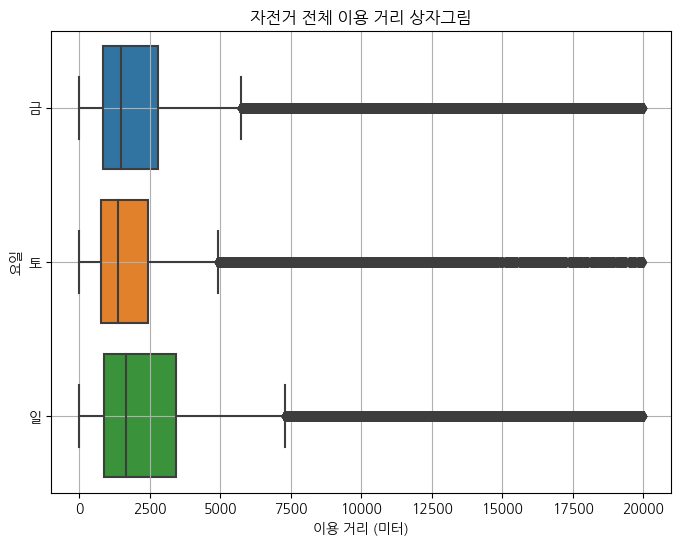

In [21]:
# 상자그림 그리기
plt.figure(figsize=(8, 6))
sns.boxplot(data = data[data["전체_이용_거리"]<20000], x='전체_이용_거리', y='요일')
plt.title('자전거 전체 이용 거리 상자그림')
plt.xlabel('이용 거리 (미터)')
plt.grid(True)
plt.show()

In [45]:
data

,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,종료_대여소_ID,종료_대여소명,전체_건수,전체_이용_분,전체_이용_거리,시작_동,시작_시간대,종료_시간대
기준_날짜,,,,,,,,,,,,
20240419,출발시간,0,ST-1000,신정7동_003_1,ST-1000,신정7동_003_1,1,0,0,신정7동,0,1
20240419,출발시간,0,ST-1000,신정7동_003_1,ST-3047,신정1동_001_1,1,8,1632,신정7동,0,1
20240419,출발시간,0,ST-1011,신월1동_012_1,ST-3276,화곡3동_002_1,1,5,719,신월1동,0,1
20240419,출발시간,0,ST-1018,목5동_080_1,ST-997,목4동_021_1,1,4,630,목5동,0,1
20240419,출발시간,0,ST-1024,진관동_108_1,ST-1329,진관동_031_1,1,3,520,진관동,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20240421,도착시간,2355,ST-952,조원동_019_2,ST-727,신대방1동_045_1,1,10,892,조원동,23,23
20240421,도착시간,2355,ST-971,월계3동_017_1,ST-2705,월계2동_048_2,1,10,2176,월계3동,23,23
20240421,도착시간,2355,ST-98,자양3동_025_2,ST-98,자양3동_025_2,1,57,6959,자양3동,23,23
